<a href="https://colab.research.google.com/github/Manojpatil123/Assignments/blob/main/Assignment_Summarizing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

Write a function which calculates the mode of a list of numbers. If there are two modes in the dataset, it should return both.

In [ ]:
no_of_children = np.array([2 , 3 , 3 , 3 , 1 , 0 , 0 , 1 , 1, 4, 3, 2, 8, 5, 6, 7 , 4, 15 , 2, 2])

In [ ]:
unique_elements, freq = np.unique(no_of_children, return_counts = True)
print(unique_elements)
print(freq)

[ 0  1  2  3  4  5  6  7  8 15]
[2 3 4 4 2 1 1 1 1 1]


In [ ]:
# Max Frequency
max_freq = np.max(freq)
k=0
a=[]
for i in freq:
  
  if i==max_freq:
   a.append(unique_elements[k])
  k+=1
print(a)


[2, 3]


# Problem 2

Perform outlier removal in the `duration` column of `phone_data.csv`

Plot the boxplot and distplot post outlier removal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data/phone_data.csv")
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [ ]:
df=df.drop('index',axis=1)

In [ ]:
df = df[df['duration']<400]

In [ ]:
df.describe()

,duration
count,759.000000
mean,40.237615
std,70.075633
min,1.000000
25%,1.000000
50%,9.000000
75%,34.429000
max,398.000000


In [ ]:
percentile_q1 = np.percentile(df['duration'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['duration'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['duration'],75)
print(percentile_q3)

1.0
9.0
34.429


In [ ]:
iq_range =  percentile_q3 - percentile_q1
iq_range

33.429

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


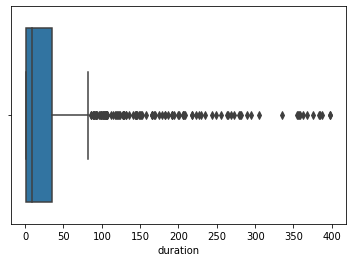

In [ ]:
sns.boxplot(df['duration'])

In [ ]:
upper=percentile_q3+1.5*iq_range
lower=percentile_q1-1.5*iq_range

In [ ]:
df1=df[(df['duration']<=upper) ]

In [ ]:
df1.describe()

,duration
count,651.000000
mean,16.310829
std,19.270197
min,1.000000
25%,1.000000
50%,4.000000
75%,34.429000
max,82.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


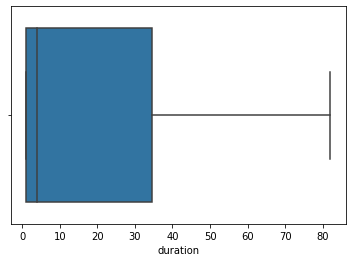

In [ ]:
sns.boxplot(df1['duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


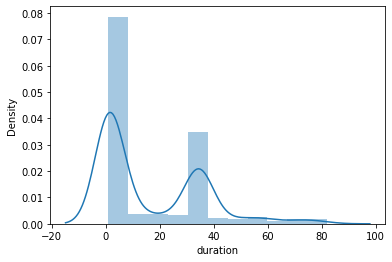

In [ ]:
sns.distplot(df1['duration'], hist=True)